## Boston Food Establishment Inspection Violation Analysis

### Project Summary

We assessed the violation records of restaurants that are part of large chains and compared them to the violation records of other restaurants to see if the infrastructure and process provided by large chains actually made a difference in restaurant violation profiles.  We also examined per restaurant frequency of violations over 10 years, probability distributions of various risk level vioations per restaurant and built a mode to predict which restaurants would be most likely to fail an inspection.

##### Chain vs Non-Chain Restaurants
We found that while some chains do in fact perform better than average, there  are also chains that perform significantly worse than average.  Simply being part of a chain does not translate into safer restaurants.

##### Number of High, Medium and Low Risk Violations Per Restaurant, Per Year

While these average violations per store, per year can vary from year to year, the graph show that the trend over the 10 year period is flat for all three levels of violation risk.

##### Probability Density Distributions of High, Medium and Low Risk Violations, per Restaurant
The probability density distributions of high, medium and low risk violations, per restaurant is extremely right skewed or positively skewed. Indeed, some stores have 900 or 700 violations, making the graph have an extremely long tail. In right skewed data, we can see that mode < median < mean. 

This data has a practical application in helping inspectors prioritize which restaurants to inspect more than once a year. 

##### Predicting Failed Inspections  with Logistic Regression
The first iteration predicting failed inspections using logistic regression gave gave a little predictive lift.  This model can likely be significantly improved by including different or additional columns as predictors.    

A practical application of these results is to inspect those restaurants that have the highest likelihood of failing, to prevent public health disasters before they happen.

### Introduction

The Boston Inspectional Services has a Health Division.  Part of their duties are to ensure that business meed state sanitary codes.  Any business offering food to the public is inspected including restaurants, food trucks, caterers, day cares ets.  Businesses are inspected at least once a year.   Follow- up inspections are conducted to ensure that violations are corrected.  

We downloaded the data set from www.data.boston.gov which tracks Food Establishment Inspection data.  


### Research Questions and Data Methodology


#### Research Questions

Many people believe that chain restaurants are better and more consistently run than the vast majority of standalone or small chain restaurants.   Their marketing would have you believe that youre experience will be the same from restaurant to restaurant and that it will be better than risking your meal experience at a restaurant you've never heard of.  

We examined the violation records of restaurants that were part of large chains and compared them to the violation records of other restaurants to see if the infrastructure and process provided by large chains actually made a difference in restaurant violation profiles. 

* Are chain restaurants (such as Subway, Dunkin, CVS ) better managed than non-chain restaurants, as judged by number and severity of violations?
* Using the above criteria, assess top/popular restaurants chains such as Subway, Dunkin, CVS

* Predict Inspection Results- can we predict which restaurants will fail an inspection by knowing just a few pieces of data about each restaurant?  We used type of restaurant, location, violation level and violation status.

#### Analyses Conducted 
* Distribution of ‘High Risk, ‘Low Risk, ‘Medium Risk’ violations.
* Results of inspections across various food establishments.
* Most Common Violations in Passed and Failed Inspections.
* Number of Violations per Restaurant, by Neighborhood.
* Violation Levels in Chains Compared to All non-chain Restaurants.
* Trend on number of Violations in the last few years.
* Probability Density Distributions of High, Medium and Low Risk Violations, by Unique Location.
* Predicting failed or passed inspections based type of restaurant, location and violation level history.

#### Data Methodology 

We employed a standard data analytics work flow.  We took the time to construct the data dictionary (See Appendix A), which was not explicity layed out anywhere.   We contacted an Inspectional Services employee to get guidance on the arcane column names and values in the result column. (See Appendix B)
●       Data cleaning, tidying, calculating
o   Removing NA and empty space,or impute if it makes sense
o   Renaming columns to appropriate name
o   Remove unimportant variables
o   Add Calculated fields, as relevant
o   Make tidy, as needed

●       Data visualization (examples)
Identify relationship between various important variables like location, Violation result, chain vs non-chain restaurants
Violations over the years
Top 5 to 10 values in the most important columns

●       Model Building
o   Randomly divide the dataset into Train and Test sets
o   Pick out factors that correlate to violation result
o   Randomly divide the dataset between Train and Test portions
o   Try training a modes on the Train dataset
o   Decide on metrics to assess performance of model
o   Use the models on the Test dataset
o   Compare Predictions of Test dataset to actual values in Test dataset




### Procedure and Discussion

#### Import Neccessary Libraries

For this project we imported the following libraries  and packages  to analyze the Boston Food Establishment Inspection data set.  Pandas, Numpy, MatPlotLib.PyPlot, Seaborn, StatsModel and SKLearn.  These libraries enable us to load, manipulate, analyze, visualize and forecast the data.  We also imported a few datetime libraries to support trend analysis of the data.

#### Import Functions Defined by Team    

We created 2 functions to support this analysis.  These functions, Change_Values and flag_brands are also imported.   The functions are in the file Group_4_Capstone_Project_Code.py.
* *Change_Values* function consolidates the many different ways of expressing the results of an inspection into fewer, more consistent categories.The 'result' column shows whether a restaurant failed or passed an inspection.  While the pass and fail verdict represent most of the rows, there were several ways of noting pass (pass, HE_pass etc.) and fail (fail, HE_fail, HE_failnor etc).  In addition there were small categories such as HE_Hearing, misc etc. We used our customer function Change_Values to streamline consolidating the values in the 'result' column.
* *flag_brands* function assesses the business name and flags the name of the chain brand in another column. 




In [1]:
# Import Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk


# Import Graphics Libraries

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import seaborn as sns
import seaborn.matrix as smatrix
sns.set(style="ticks") 

# Import Machine Learning Libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# For managing dates and times:
from datetime import date
from datetime import time
from datetime import datetime

# Import Statistics Libraries
import statsmodels
import statsmodels.stats as stats

# Import OurCustom Functions
from  Group_4_Capstone_Project_Code import Change_values
from  Group_4_Capstone_Project_Code import flag_brands

# Enable inline display of graphics
from sklearn import linear_model
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
%matplotlib inline 


#### Import Data set

We accessed a public data set from data.boston.gov available at this website:  https://data.boston.gov/dataset/. This data is from the Health Division of the Department of Inspectional Services, which ensures that all Boston's food establishments comply with relevant sanitary codes and standards.   These inspections occur at least once a year and followup inspections are performed on high risk establishments.  

There are 26 columns and 579,000 rows of data.   The columns include the business name, licencse number, violation details (level, status, date, comments etc.), address, etc.   

We decided to analyze the whole data set including both active and inactive licenses.   In assessing the food safety performance of chains over the period 2007 to 2019, the currently inactive licenses were active and generating data at some point during this time period.   To understand the whole performance, it is necessary to include all the stores operating between 2007 and 2019.

In [2]:
filename = "https://data.boston.gov/dataset/03693648-2c62-4a2c-a4ec-48de2ee14e18/resource/4582bec6-2b4f-4f9e-bc55-cbaa73117f4c/download/tmpcdlqg343.csv"
headers = ["symboling","normalized-losses","make"]
df = pd.read_csv(filename,header=0,mangle_dupe_cols=True,skip_blank_lines=True,dtype ='unicode',parse_dates=True)

**Table 1  First Three Rows of Boston Food Establishment Inspection Data Set**

In [3]:
df.head(n = 3)

,businessname,dbaname,legalowner,namelast,namefirst,licenseno,issdttm,expdttm,licstatus,licensecat,...,violdttm,violstatus,statusdate,comments,address,city,state,zip,property_id,location
0,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,2013-04-05 12:47:23,2019-12-31 23:59:00,Active,FS,...,2013-02-15 12:19:42,Fail,NaN,Provide glass storage rack.,635 Hyde Park AVE,Roslindale,MA,02131,77476,"(42.278590000, -71.119440000)"
1,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,2013-04-05 12:47:23,2019-12-31 23:59:00,Active,FS,...,2013-02-15 12:19:42,Fail,NaN,Provide dish rack over 3 bay sink to replace m...,635 Hyde Park AVE,Roslindale,MA,02131,77476,"(42.278590000, -71.119440000)"
2,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,2013-04-05 12:47:23,2019-12-31 23:59:00,Active,FS,...,2013-02-15 12:19:42,Fail,NaN,Provide dish washer at ware washing area.,635 Hyde Park AVE,Roslindale,MA,02131,77476,"(42.278590000, -71.119440000)"


####  Data Set Profiling

Before perfoming any data manipulation, transformation or analysis, we need to understand the nature, values and counts of each column.    Most of the columns are categorical, strings or dates, but they are all imported as objects (strings). 

Since these columns are mostly categorical, we use the categorical describe function to find the unique number of levels in each catergory, the most frequent value and the number of times mentioned.

We performed many more analyses than are presented in this paper simply to understand the meaning of the columns, the destribution of values and how the columns map to the process steps that happen after a failed inspection.  These analyses included:
* Exploring the worst restaurants with the highest number of violations
* Exploring restaurants that were temporarily closed for food violations

In [4]:
print("The dimensions of the food inspection data set are: {}".format(df.shape))
print("The size of the food inspection data set is : {} " .format(df.size))
Data1=df.astype('category')


The dimensions of the food inspection data set are: (579540, 26)
The size of the food inspection data set is : 15068040 


**Table 2  Categorical Descriptions of the Data Set Columns**

In [5]:
Data1.describe()

,businessname,dbaname,legalowner,namelast,namefirst,licenseno,issdttm,expdttm,licstatus,licensecat,...,violdttm,violstatus,statusdate,comments,address,city,state,zip,property_id,location
count,579540,5513,401777,579540,579426,579540,579540,579540,579540,579540,...,579540,546989,241002,579536,579540,579514,579540,579305,449220,414841
unique,7170,98,2652,6585,3105,8452,8416,18,3,4,...,90732,3,30840,232767,4575,56,4,43,3701,3158
top,Subway,1844 Inc.,,CVS PHARMACY INC.,,23987,2012-03-12 13:27:51,2019-12-31 23:59:00,Active,FS,...,,Fail,2013-10-29 15:39:07,,1 Citywide ST,Boston,MA,02116,0,"(42.355830000, -71.060400000)"
freq,2594,377,32631,2428,272805,907,907,368491,361125,277199,...,32554,300389,88,57827,4581,218915,567298,45887,7034,2309


#### Data Cleaning 

Data cleaning is the process of preparing data for analysis by removing or modifying data set which has incorrect, incomplete or outliers. Data cleaning is not simply about deleting information to make space for new data, but rather finding a way to maximize a data set’s quality without necessarily deleting the information.
Based on number of nulls or being redundant the following columns are dropped:
* dbaname, legalowner, namelast, namefirst - For the focus of this project, these columns will not add analytical value.  For this project we will focus on the column 'businessname' which had 0 missing values.
* propertyid - 177,000 are missing, but 100% of addresses are filled in, we will use address
* state - All restaurants in this data set are in Boston, MA, therefore this column adds no value.
* violation - We are not analyzing the code citation of violations.  Instead we will use the violation description.
* comments - This project will not analyze the comments, therefore this column will be deleted.

In addition we removed rows which contain missing values in the columns called violation level, violation status and description because we want to focus on those columns for this project.   We need these columns without NA's for our analysis.

**Table 3 Percent of Column Values Missing in Food Inspection Data Set**

In [6]:
missing_data = df.isnull()
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data
print(missing_data)
df['viollevel'].replace('', np.nan ,inplace=True)
df.dropna(subset=['viollevel'],inplace=True)


               Total    Percent
dbaname       574027  99.048728
statusdate    338538  58.414950
legalowner    177763  30.673120
location      164699  28.418918
property_id   130320  22.486800
violdesc       32552   5.616869
violation      32551   5.616696
viollevel      32551   5.616696
violstatus     32551   5.616696
zip              235   0.040549
namefirst        114   0.019671
city              26   0.004486
comments           4   0.000690
namelast           0   0.000000
expdttm            0   0.000000
licenseno          0   0.000000
issdttm            0   0.000000
resultdttm         0   0.000000
licstatus          0   0.000000
licensecat         0   0.000000
descript           0   0.000000
result             0   0.000000
violdttm           0   0.000000
address            0   0.000000
state              0   0.000000
businessname       0   0.000000


In [7]:
df = df.drop(columns = ['dbaname', 'property_id','state','namelast','namefirst','legalowner','violation'])   
df.rename(columns = {'city': 'neighborhood'}, inplace = True)
print(list(df))


['businessname', 'licenseno', 'issdttm', 'expdttm', 'licstatus', 'licensecat', 'descript', 'result', 'resultdttm', 'viollevel', 'violdesc', 'violdttm', 'violstatus', 'statusdate', 'comments', 'address', 'neighborhood', 'zip', 'location']


#### Data Transformation

In several columns we observed that the same entity was recorded in many different ways.  To make these more consistent we took the following actions on the following columns:
* Reduce the number of unique values by transforming certain columns to lower case.  This made it easier to consolidate the data in the columns 'businessname', 'address' and 'city'.   
* Rename City to Neighborhood
> We renamed the column 'city' to 'neighborhood'.  All the restaurants are in technically in Boston, but this column really reflects which neighborhood a restaurant is in.   It therefore made sense to rename the 'city' column to 'neighborhood' and clean up the column. Several of the neighborhoods were expressed different ways. We consolidated these different values to a consistent spelling for each neighborhood. Special characters were also removed (e.g. '/'). 

* Result column:  we consolidated many levels into fewer, more meaningful levels for this analysis. For example, a restaurant that passed its inspection may be recorded as Pass or HE_Pass in different years. In this case we named them all Pass.   We used our custom function **Change_Values** to accomplish this consolidation and renaming of column values.
* Violation level:  We replaced the stars in the column 'viollevel' to make the values easier to understand. We replaced stars with High, Medium and Low Risk. We used our custom function **Change_Values** to accomplish this renaming of column values.
* Brand column:   We created a new column called 'brand' which flags which restaurants are part of the Subway, Starbucks, Dunkin (etc.) chains and which are not part of a chain.  This is a focus point of our analysis. We flagged 14 different chains.  We used our custom function **flag_brands** applied to a newly created 'brand' column.  

* City column:   We consolidated the values in the city column by using our custom function **flag_brands** applied to a existing 'city' column. In later code we renamed the city column to the neighborhood column for the reasons stated a the beginning of this section.

In [8]:
df["businessname"] = df['businessname'].str.lower()
df["address"] = df['address'].str.lower()
df.rename(columns = {'city': 'neighborhood'}, inplace = True)
df.neighborhood = df.neighborhood.str.lower().str.replace('/', '')
df.insert(loc=0, column='brand', value="") 

Brand_Dict = {'mcdonald':"McDonalds",
        "subway": "Subway",
        "dunkin": "Dunkin",
        "au bon": "Au Bon Pain",
        "burger king": "Burger King",
        "domino": "Domino's",
        "starbuck": "Starbucks",
        "cvs": "CVS",
        "chipotle": "Chipotle",
        "wendy": "Wendys",
        "papa john": "Papa Johns",
        "chicago uno": "Chicago Uno",
        "finagle": "Finagle a Bagel",
        "panera": "Panera",
        "chipotle": "Chipotle",
        "boloco": "Boloco",
        "qdoba": "Qdoba"
       }
City_dict = {"roxbury":"roxbury",
             "financial":"downtown financial district",
             "east  boston":"east boston",
             "west":"west boston",
             "bostonchinatown":"chinatown boston"}
flag_brands(df.businessname,df,'brand',Brand_Dict)
flag_brands(df.neighborhood,df,'neighborhood',City_dict)

Chains = df.groupby('brand')['licenseno'].nunique().sort_values(ascending = False)


Violstat_keydict={'HE_Fail':'Fail','HE_FAILNOR':'Fail','HE_FailExt':'Fail','Failed':'Fail',
                                'HE_Pass':'Pass','HE_TSOP':'TSOP',
                                'HE_Closure':'Misc','HE_Misc':'Misc','DATAERR':'Misc','HE_Hold':'Misc',
                                'HE_Filed':'Pending','HE_Hearing':'Pending'}
Change_values(df['result'],Violstat_keydict)

Change_values(df['viollevel'],{'***':'HighRisk','**':'MediumRisk','*':'LowRisk'})

### Exploratory Data Analysis and Discussion


Before we delve into our research questions, we need to become familiar with the data and understand distributions of values in the key columns.


#### Violation Severity Distribution

We looked at the distribution of the severity levels of violations cited between 2007 and 2019.  While the vast majority of violations are low risk at over 400,000, it's interesting to note that the second most numerous type of violations are high risk violations at over 93,000.  High risk violations are those that could put the public's health at risk.   Some common high risk violations include not holding food at cold enough temperatures, keeping food contact surfaces clean and even procedural knowledge of the person in charge.  In later analyses, we focus on the violation severity or level as a key indicator and predictor of restaurant performance.


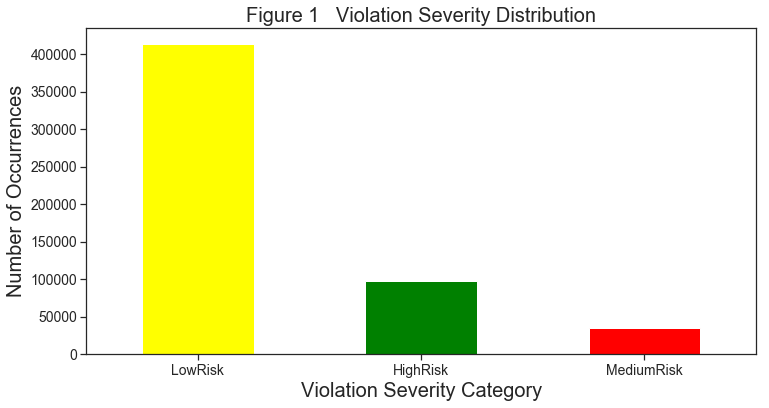

In [9]:
ax = df['viollevel'].value_counts().head(3).plot.bar(
    figsize = (12,6),
    fontsize = 14,
    color={"Yellow","green","Red"},
    rot=0,
)
ax.set_title("Figure 1   Violation Severity Distribution", fontsize = 20)
ax.set_xlabel("Violation Severity Category", fontsize = 20)
ax.set_ylabel("Number of Occurrences", fontsize = 20)
plt.show()

#### Decision of Inspection

The graph below shows the number of inspections vs the results. The unique values of result variable are as shown on x axis. It is evident that maximum number of rows are associated with failed inspections. The second largest number of occurrences were “Pass” followed by “Pending”. On the other hand, the count of violations are fewer for TSOP, HE_OutBus, Misc, HE_NotReq and HE_VolClos results.

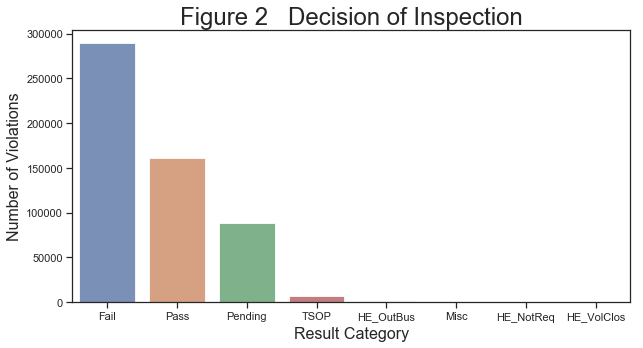

In [10]:
result_count  = df['result'].value_counts()
result_count = result_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(result_count.index, result_count.values, alpha=0.8)
plt.title('Figure 2   Decision of Inspection', fontsize = 24)
plt.ylabel('Number of Violations', fontsize=16)
plt.xlabel('Result Category', fontsize=16)
plt.show()

#### Most Common Violations in Passed and Failed Inpsections

It's very interesting that the most numerous violations are the same violations in both the passed and failed inspections.  The difference is that there are about half as many of those violations in the passed inspections as in failed inspections.  To emphasize this, the y-axis is scaled to 20,000 on both Figure 3 and Figure 4.   These top violations are also Low Risk violations, which are much more common than High or Medium Risk Violations as detailed the in Violation Severity Distribution above. 

In [11]:
# List the top violations by count for both passed and failed inspections
df.groupby("result")["result"].count()
Viol_Fail = df[df["result"] == "Fail"].groupby("violdesc")["violdesc"].count().sort_values(ascending=False).head(10)

**Table 4 Top Violations by Count for Failed Inspections**

*Violation Description_____________________________Count*

In [12]:
print(Viol_Fail)

violdesc
Non-Food Contact Surfaces Clean           22352
Improper Maintenance of Walls/Ceilings    20321
Non-Food Contact Surfaces                 17879
Improper Maintenance of Floors            17107
Food Protection                           15901
Food Contact Surfaces Clean               14348
Hand Cleaner  Drying  Tissue Signage      12279
Premises Maintained                       11314
Wiping Cloths  Clean  Sanitize             9637
Installed and Maintained                   9236
Name: violdesc, dtype: int64


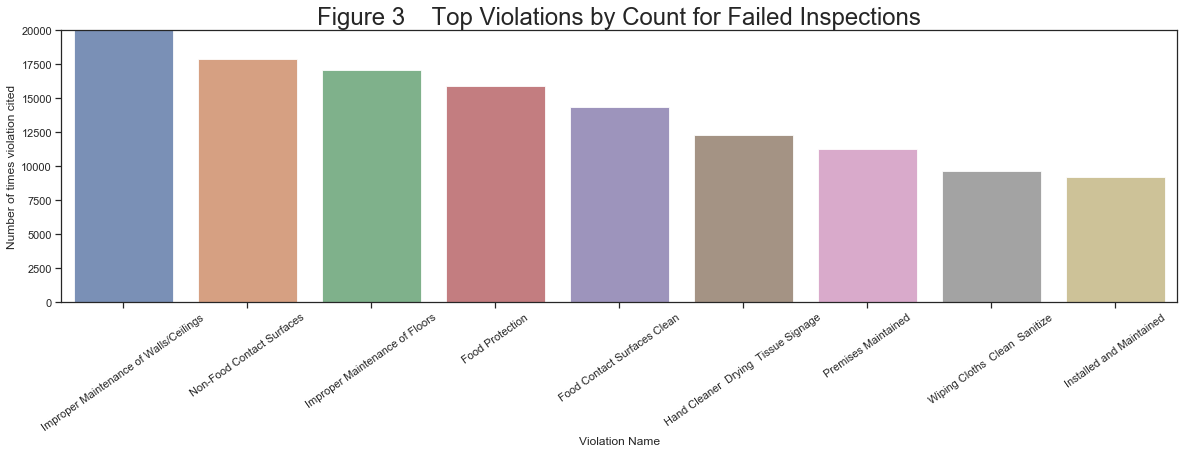

In [13]:
plt.figure(figsize=(20,5))
sns.barplot(Viol_Fail.index[1:], Viol_Fail.values[1:], alpha=0.8)
plt.ylim(0,20000)
plt.title('Figure 3    Top Violations by Count for Failed Inspections', fontsize = 24)
plt.xticks(rotation=35)
plt.ylabel('Number of times violation cited', fontsize=12)
plt.xlabel('Violation Name',fontsize=12)
plt.show()

##### Top Violations in Failed Inspections

The food inspection dataset contains 280 unique violations. Figure 3 shows the top 9 violations in failed inspections, specifically what are the reason that the food establishments experienced failed inspections.
The most common reason observed is  “improper maintenance of walls/ceilings”, which accounted  for 20,000 times in the dataset. “Non-Food contact surfaces” was observed for 17,500 times. Other top reasons included improper maintenance of floors, food protection and also not maintaining and installing necessary things like exhaust fan.



In [14]:
#print("The top violations and counts for Passed Inspections is:")
Viol_Pass = df[df["result"] == "Pass"].groupby("violdesc")["violdesc"].count().sort_values(ascending=False).head(10)

**Table 5     Top Violations by Count for Passed Inspections**


In [15]:
print(Viol_Pass)

violdesc
Non-Food Contact Surfaces Clean           13242
Improper Maintenance of Walls/Ceilings    11326
Non-Food Contact Surfaces                  9809
Food Protection                            9328
Improper Maintenance of Floors             9160
Food Contact Surfaces Clean                8235
Hand Cleaner  Drying  Tissue Signage       6971
Premises Maintained                        6312
Wiping Cloths  Clean  Sanitize             5680
Installed and Maintained                   5206
Name: violdesc, dtype: int64


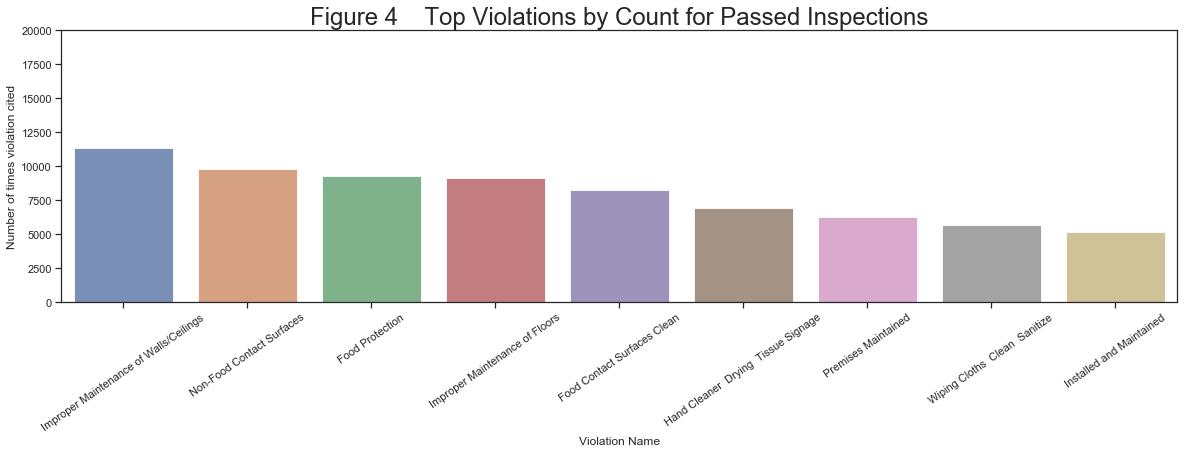

In [16]:
plt.figure(figsize=(20,5))
sns.barplot(Viol_Pass.index[1:], Viol_Pass.values[1:], alpha=0.8)
plt.ylim(0,20000)
plt.title('Figure 4    Top Violations by Count for Passed Inspections', fontsize = 24)
plt.xticks(rotation=35)
plt.ylabel('Number of times violation cited', fontsize=12)
plt.xlabel('Violation Name',fontsize=12)
plt.show()

##### Top Violations in Passed Inspections

Figure 4  shows the top 9 violations that occur during passed inspections.   For example, “Improper maintenance of walls/ceilings” was one of the top reasons for both passed and failed inspections. This violation is considered  to be of “low risk”. It simply means that the food establishments was charged with “Improper maintenance of walls/ceilings” violation but they were able to fix it within 10 business days (for example) and passed the follow up inspections. Other top reasons included “Non-food contact surfaces”,”Food protection”,”Food maintenance of floors”.


In [17]:
# Number of Violations per Restaurant, by Neighborhood
hood = df.groupby('neighborhood')['licenseno'].nunique().sort_values(ascending = False)
hood = pd.DataFrame({'Neighborhood':hood.index, 'StoreCount':hood.values})
hood.index.name = 'index'
HoodViols = df['neighborhood'].value_counts()
HoodViols = pd.DataFrame({'Neighborhood':HoodViols.index , 'ViolsCount': HoodViols.values })
HoodViols .index.name = 'index'
H = pd.merge(hood, HoodViols, on = 'Neighborhood' )
H['ViolsPerStore'] = (H.ViolsCount / H.StoreCount).round(1)
H.head(n=10)


,Neighborhood,StoreCount,ViolsCount,ViolsPerStore
0,boston,3335,254047,76.2
1,dorchester,847,71479,84.4
2,roxbury,587,60936,103.8
3,east boston,560,36425,65.0
4,brighton,310,15049,48.5
5,allston,309,19697,63.7
6,jamaica plain,244,24827,101.8
7,south boston,223,16907,75.8
8,roslindale,195,14723,75.5
9,hyde park,123,8608,70.0


#### Number of Violations per Restaurant, by Neighborhood      

Figure 5 and Table 6 below show the number of violations per food establishments by neighborhood. The data is normalized, we divided the total violations count for one neighborhood by the total number of stores in that neighborhood.   Table 6 highlights that we still need additional cleanup of the neighborhood column.   For example,  Chestnut Hill with only 2 restaurants has 170 violations per store.  But Chestnut Hill is technically in Newton.   

If we only focus on areas with more than 50 stores, then we can see Roxbury has the highest number of “violations per store”, with 587 store count and 60,936 violations. It is surprising that even though Mission hill has just 66 stores, its violation per store is high with 102.6.   On the other hand, Brighton has half the violation count per store  (48.5) and almost triple the number of store counts (310) as compared to Mission Hill. This says Brighton still performed better.

**Table 6     Number of Violations per Restaurant, by Neighborhood**

In [18]:
# J = HNeighborhood  StoreCount  ViolsCount
J = H[['Neighborhood', 'ViolsPerStore']].sort_values(by = "ViolsPerStore",ascending = False)
J.head(n=10)



,Neighborhood,ViolsPerStore
16,chestnut hill,170.5
19,south end,117.0
2,roxbury,103.8
12,mission hill,102.6
6,jamaica plain,101.8
1,dorchester,84.4
10,mattapan,76.6
0,boston,76.2
7,south boston,75.8
8,roslindale,75.5


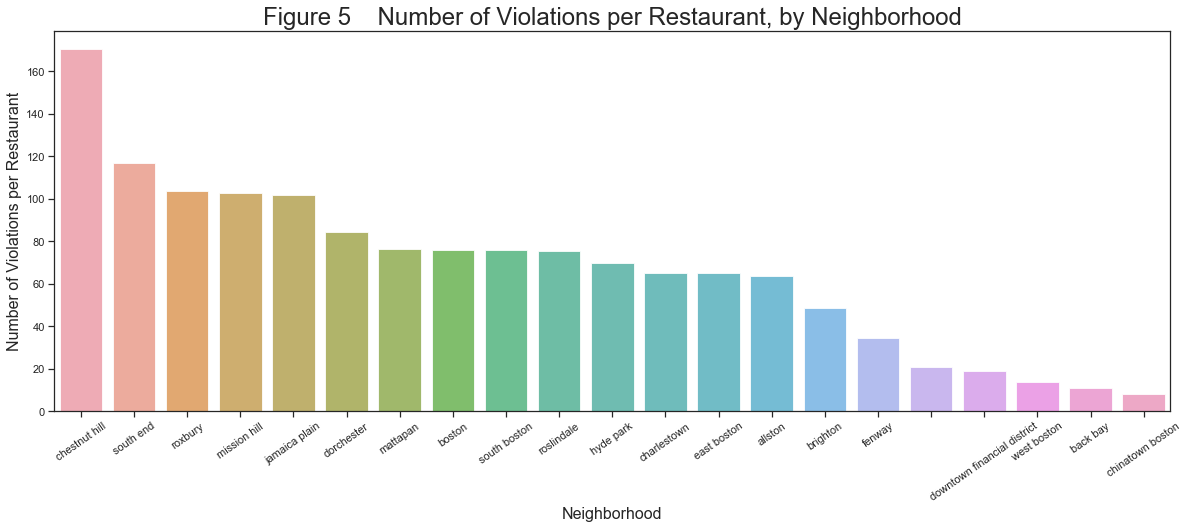

In [19]:
plt.figure(figsize=(20,7))
sns.barplot(J.Neighborhood, J.ViolsPerStore, alpha=0.8)
plt.title('Figure 5    Number of Violations per Restaurant, by Neighborhood', fontsize = 24)
plt.ylabel('Number of Violations per Restaurant', fontsize=16)
plt.xlabel('Neighborhood', fontsize=16)
plt.xticks(rotation=35)
plt.show() 

#### Number of Locations by Chain

Earlier, we flagged which restaurants were part of well-known chains.  Since we want to know how these restaurants perform compared to all others, the first step is to understand how many locations are in each chain.  We grouped each chain and counted the unique number of license numbers (or store locations) in each chain.  We converted the resulting series into a dataframe to enable adding additional analyses to the dataframe.

The figure below shows that Dunkin Donuts and Starbucks are the most numerous chains with a total of 155 locations and 75 locations respectively, that have operated from 2007 to 2019.  The chains we selected represent 559 out of a total of 7,058 restaurants.   We will focus on the performance of these chains compared to the other 6,499 restaurants.  This is the bar graph, but the Table 7 is more informative.

In [20]:
# Let's see how many stores or restaurants are in the top restaurant chains 
Chains = df.groupby('brand')['licenseno'].nunique().sort_values(ascending = False)
Chains = pd.DataFrame({'Chain':Chains.index, 'StoreCount':Chains.values})
Chains.index.name = 'index'
Chains.iloc[0,0] = 'All Other'


**Table 7    Number of Locations, by Chain**  

In [21]:
print(Chains)

                 Chain  StoreCount
index                             
0            All Other        6499
1               Dunkin         155
2            Starbucks          75
3               Subway          66
4            McDonalds          56
5                  CVS          43
6          Au Bon Pain          35
7             Domino's          31
8          Burger King          24
9               Panera          14
10               Qdoba          13
11              Boloco          13
12     Finagle a Bagel          10
13              Wendys           8
14          Papa Johns           8
15            Chipotle           8


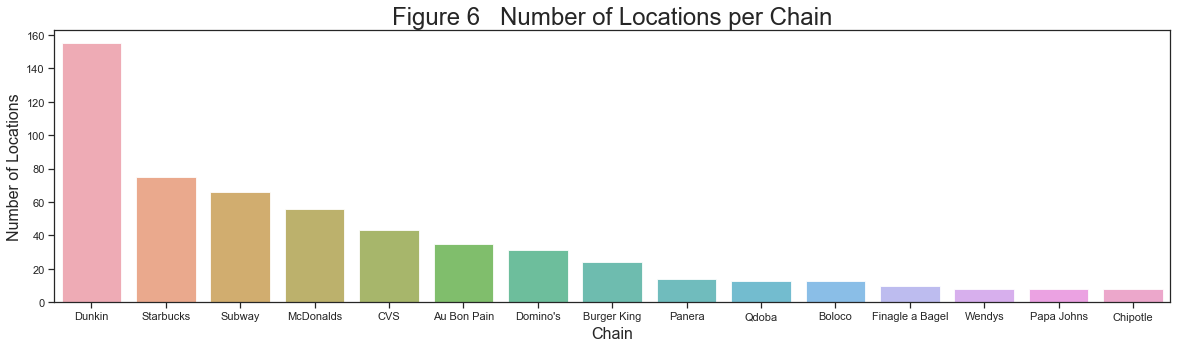

In [22]:
#  NOTE: This is the bar graph, but the table is more informative.
plt.figure(figsize=(20,5))
sns.barplot(Chains.Chain[1:], Chains.StoreCount[1:], alpha=0.8)
plt.title('Figure 6   Number of Locations per Chain', fontsize = 24)
plt.ylabel('Number of Locations', fontsize=16)
plt.xlabel('Chain', fontsize=16)
plt.show() 

#### Violation Levels in Chains Compared to All Other Restaurants

Our hypothesis is that restaurants that are part of chains would be better managed than a typical non-chain restaurant.  If we define that good management results in fewer violations at all risk levels, and poor management results in more violations, then our hypothesis is that chain restaurants will have fewer violations than the average number of violations of all the other restaurants. 

In this analysis we counted the number of high, medium and low risk violations of each chain and divided them by the number of locations in each chain, resulting in an average number of high, medium and low violations for each chain.   We did the same for all other restaurants which yields the table below.  

For example the chain restaurant average number of High Risk Violations ranged from 6 (Starbucks) to 22.8 (Finagle a Bagel).  The average for all non-chain stores is 14.2.   Not all the chains had fewer average High Risk Violations than the non-chain restaurants.  Therefore we cannot say that being part of a large chain automatically results in fewer violations. 

In [23]:
# We need to create a fresh Chains df for this analysis.  We list the Chain and the Number of Stores in that Chain
Chains = df.groupby('brand')['licenseno'].nunique().sort_values(ascending = False)
Chains = pd.DataFrame({'Chain':Chains.index, 'StoreCount':Chains.values})
Chains.index.name = 'index'

HiRiskViols = df[df["viollevel"] == "HighRisk"].groupby("brand")["brand"].count().sort_values(ascending=False)
HiRiskViols = pd.DataFrame({'Chain':HiRiskViols.index , 'HiRiskCount': HiRiskViols.values })
HiRiskViols.index.name = 'index'

MedRiskViols = df[df["viollevel"] == "MediumRisk"].groupby("brand")["brand"].count().sort_values(ascending=False)
MedRiskViols = pd.DataFrame({'Chain':MedRiskViols.index , 'MedRiskCount': MedRiskViols.values })
MedRiskViols.index.name = 'index'

LoRiskViols = df[df["viollevel"] == "LowRisk"].groupby("brand")["brand"].count().sort_values(ascending=False)
LoRiskViols = pd.DataFrame({'Chain':LoRiskViols.index , 'LoRiskCount': LoRiskViols.values })
LoRiskViols.index.name = 'index'

# Append the High, Medium and Low Risk Counts to the number of stores by name of restaurant chain
X = pd.merge(Chains, HiRiskViols, on = 'Chain', how = 'left')
X = pd.merge(    X ,MedRiskViols, on = 'Chain', how = 'left')
X = pd.merge(     X ,LoRiskViols, on = 'Chain', how = 'left')
X['HiPerStore'] = (X.HiRiskCount / X.StoreCount).round(1)
X['MedPerStore'] = (X.MedRiskCount / X.StoreCount).round(1)
X['LoPerStore'] = (X.LoRiskCount / X.StoreCount).round(1)

X.iloc[0,0] = 'All Other'


**Table 8   Chain and Per-Store Average Violation, by Severity Level**

In [24]:
# Print only the Chain and Per-Store Average Violation, by Severity Level
Y = X[['Chain','HiPerStore','MedPerStore','LoPerStore']]
print(Y)


              Chain  HiPerStore  MedPerStore  LoPerStore
0         All Other        14.2          5.1        59.5
1            Dunkin         8.8          3.5        46.1
2         Starbucks         6.0          2.5        34.9
3            Subway        12.9          3.1        42.0
4         McDonalds        11.7          5.8        63.9
5               CVS         1.6          1.7        45.6
6       Au Bon Pain        16.9          4.1        66.7
7          Domino's         9.2          1.2        46.9
8       Burger King         7.2          4.3        64.4
9            Panera        10.5          4.1        47.3
10            Qdoba         6.2          4.3        33.4
11           Boloco        19.7          7.1        66.8
12  Finagle a Bagel        22.8          7.1        72.1
13           Wendys        13.2          6.4        68.9
14       Papa Johns        14.8          6.9        87.1
15         Chipotle        13.1          3.1        33.5


####  Number of High, Medium and Low Risk Violations Per Restaurant, Per Year

Table 9 and Figure 7 depict the number of violations occurred overall in various Boston city’s food establishments, normalized by year and by store. While these average violations per store, per year can vary from year to year, the graph show that the trend over the 10 year period is flat for all three levels of violation risk.

In [25]:
# extract year from violation date and time for trend

df['viol_year']=df['violdttm'].str.split("-").str[0]
HiRiskViols = df[df["viollevel"] == "HighRisk"].groupby("viol_year")["viol_year"].count()
HiRiskViols1 = df[df["viollevel"] == "HighRisk"].groupby("viol_year")["licenseno"].nunique()
HiRiskViols = pd.DataFrame({'Year':HiRiskViols.index , 'HiRiskCountperStore': HiRiskViols.values/HiRiskViols1.values}).sort_values(by='Year',ascending=True)
MedRiskViols = df[df["viollevel"] == "MediumRisk"].groupby("viol_year")["viol_year"].count()
MedRiskViols1 = df[df["viollevel"] == "MediumRisk"].groupby("viol_year")["licenseno"].nunique()
MedRiskViols = pd.DataFrame({'Year':MedRiskViols.index , 'MediumRiskCountperStore': MedRiskViols.values/MedRiskViols1.values }).sort_values(by='Year',ascending=True)
LoRiskViols = df[df["viollevel"] == "LowRisk"].groupby("viol_year")["viol_year"].count()
LoRiskViols1 = df[df["viollevel"] == "LowRisk"].groupby("viol_year")["licenseno"].nunique()
LoRiskViols = pd.DataFrame({'Year':LoRiskViols.index , 'LowRiskCountperStore': LoRiskViols.values/LoRiskViols1.values }).sort_values(by='Year',ascending=True)
result = pd.merge(LoRiskViols, MedRiskViols,on='Year')
result1 =pd.merge(result, HiRiskViols,on='Year')
result1= result1.iloc[1:12].round(1)


**Table 9  Number of High, Medium and Low Risk Violations per Store ,per Year (2008-2018)**

In [26]:
result1

,Year,LowRiskCountperStore,MediumRiskCountperStore,HiRiskCountperStore
1,2008,13.3,3.0,5.7
2,2009,12.2,3.0,5.1
3,2010,11.7,2.8,5.1
4,2011,10.7,3.0,4.4
5,2012,13.4,3.1,5.3
6,2013,12.2,2.9,5.1
7,2014,12.9,3.1,5.3
8,2015,12.3,3.1,5.1
9,2016,13.4,3.0,5.2
10,2017,10.9,2.8,4.7


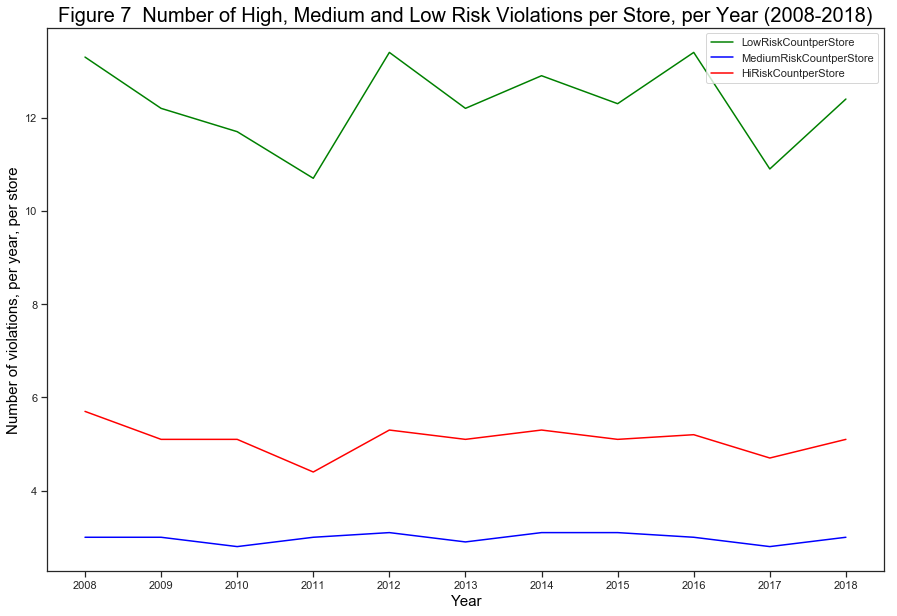

In [27]:
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(result1['Year'], result1['LowRiskCountperStore'],color = 'green')
ax.plot(result1['Year'], result1['MediumRiskCountperStore'],color = 'blue')
ax.plot(result1['Year'], result1['HiRiskCountperStore'],color = 'red')
plt.xlabel('Year',fontsize = 15,color='BLACK')
plt.ylabel('Number of violations, per year, per store',fontsize = 15,color='BLACK')
plt.title('Figure 7  Number of High, Medium and Low Risk Violations per Store, per Year (2008-2018)',fontsize = 20,color='Black')
plt.legend(loc=1)

#### Number of High, Medium and Low Risk Violations per Year(2008-2018)

Table 9 and Figure 7 above confirm that the low risk violations are the most common one. It ranges from 25,000 to 40,000 violations per year. The Medium and High-risk violations remained almost steady over the 10 years. From the graph, it is clear that Year 2016 had the maximum number of low risk violations in Boston neighborhoods whereas 2011 had the least one.


#### Probability Density Distributions of High, Medium and Low Risk Violations, by Unique Location (Per Restaurant)

Probability density function (PDF) is a statistical concept that defines a probability distribution for a continuous random variable.  Low risk violations include "food container labels", "maintainance of floor". the medium risk violations include "Insects  Rodents  Animals","sewage and waste water" are the least likely to happen. High risk violations include "Spoilage Unsafe Food", "Toxic Items", "Medicines  FirstAid Storage" have 5 to 20 number of violations per store. Low risk violations have high number of outliers,which are far removed from the mass of data distribution.

If we looked at climate data, for example, the probability of the temperature will be between 80 and 85 degrees is measured by PDF. PDF calculates the probability of a range of outcomes for temperature. When the PDF is graphically portrayed, the area covered under the curve will indicate the interval in which the variable is falling. The total area in the interval of the graph equals the probability of a continuous random variable occurring.

Figure 8 is extremely right skewed or positively skewed. Indeed, some stores have 900 or 700 violations, making the graph have an extremely long tail. In right skewed data, we can see that mode < median < mean. 

This data has a practical application in helping inspectors prioritize which restaurants to inspect more than once a year. 


In [28]:
# PROBABILITY DENSITY DISTRIBUTIONS OF NUMBER  OF HIGH MED AND LOW RISK VIOLATIONS PER UNIQUE LICENSE NUMBER (STORE)    
Stores = df.groupby('licenseno')['licenseno'].count().sort_values(ascending=False)
#Convert the Series created by groupby, into a dataframe and rename and re-allign the columns
Stores = pd.DataFrame({'Store-Lic.No.':Stores.index, '# of Rows':Stores.values})
Stores.index.name = 'index'

HiRiskViols2 = df[df["viollevel"] == "HighRisk"].groupby('licenseno')['licenseno'].count().sort_values(ascending=False)
HiRiskViols2 = pd.DataFrame({'Store-Lic.No.':HiRiskViols2.index , 'HiRiskCount': HiRiskViols2.values })
HiRiskViols2.index.name = 'index'

MedRiskViols2 = df[df["viollevel"] == "MediumRisk"].groupby('licenseno')['licenseno'].count().sort_values(ascending=False)
MedRiskViols2 = pd.DataFrame({'Store-Lic.No.':MedRiskViols2.index , 'MedRiskCount': MedRiskViols2.values })
MedRiskViols2.index.name = 'index'

LoRiskViols2 = df[df["viollevel"] ==  "LowRisk"].groupby('licenseno')['licenseno'].count().sort_values(ascending=False)
LoRiskViols2 = pd.DataFrame({'Store-Lic.No.':LoRiskViols2.index , 'LoRiskCount': LoRiskViols2.values })
LoRiskViols2.index.name = 'index'
# Append the High, Medium and Low Risk Counts to the number of stores by name of restaurant chain
S = pd.merge(Stores, HiRiskViols2, on = 'Store-Lic.No.', how = 'left')
S = pd.merge(    S ,MedRiskViols2, on = 'Store-Lic.No.', how = 'left')
S = pd.merge(     S ,LoRiskViols2, on = 'Store-Lic.No.', how = 'left')

S['Store-Lic.No.'] = S['Store-Lic.No.'].astype(int)   
HiRiskViols3 = df[df["viollevel"] == "HighRisk"].groupby('licenseno')['licenseno'].count().sort_values(ascending=False)
HiRiskViols4 = np.log(HiRiskViols3)
MedRiskViols3 = df[df["viollevel"] == "MediumRisk"].groupby('licenseno')['licenseno'].count().sort_values(ascending=False)
MedRiskViols4 = np.log(MedRiskViols3)
LoRiskViols3 = df[df["viollevel"] ==  "LowRisk"].groupby('licenseno')['licenseno'].count().sort_values(ascending=False)
LoRiskViols4 = np.log(LoRiskViols3)

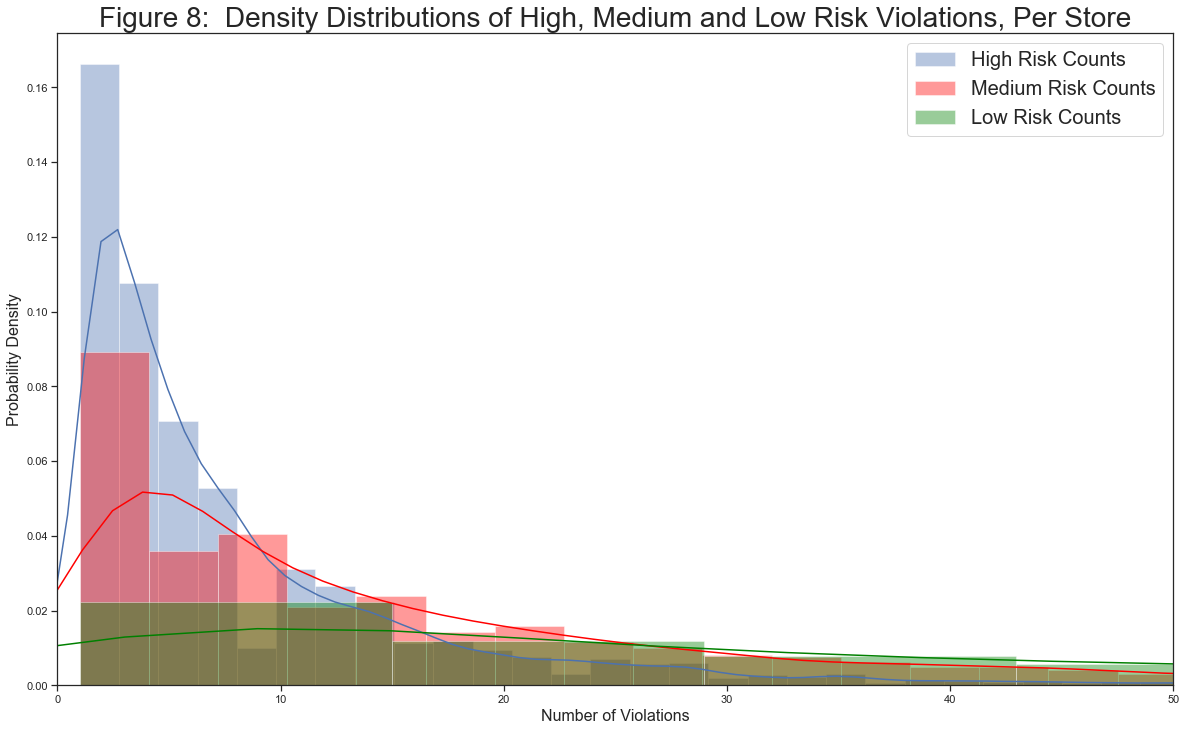

In [29]:
# Raw distribution of counts is highly skewed 
plt.figure(figsize=(20,12))
plt.xlim(0,50)
sns.distplot(MedRiskViols3)
sns.distplot(HiRiskViols3, color='red')
sns.distplot(LoRiskViols3, color='green')
plt.legend(['High Risk Counts', 'Medium Risk Counts','Low Risk Counts'], fontsize = 20)
plt.title('Figure 8:  Density Distributions of High, Medium and Low Risk Violations, Per Store', fontsize = 28)
plt.ylabel('Probability Density', fontsize=16)
plt.xlabel('Number of Violations', fontsize=16)
plt.show()

C:\Users\sush1\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


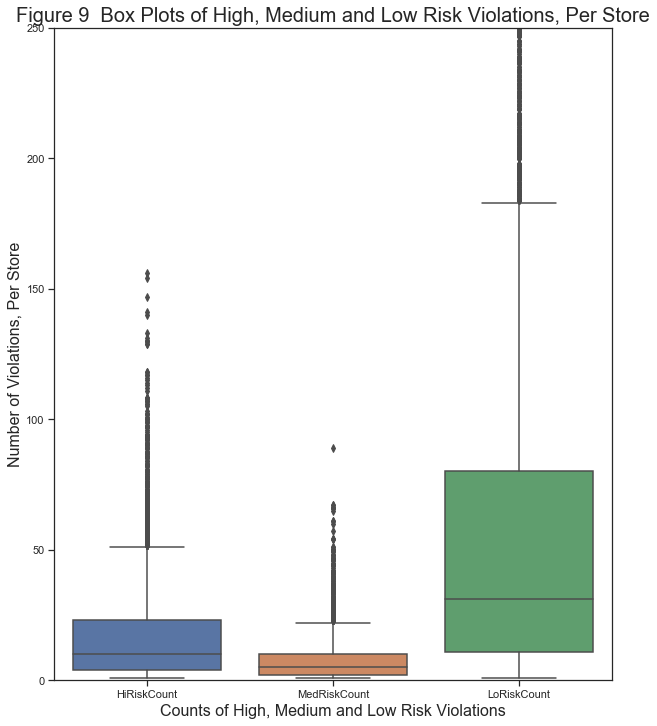

In [30]:
# Create Boxplots of  by unique license number, the counts of High, Med and Low Risk Violations
plt.figure(figsize=(10,12))
plt.ylim(0,250)
sns.boxplot(data=S.ix[:,2:5])
plt.title('Figure 9  Box Plots of High, Medium and Low Risk Violations, Per Store', fontsize = 20)
plt.ylabel('Number of Violations, Per Store', fontsize=16)
plt.xlabel('Counts of High, Medium and Low Risk Violations', fontsize=16)
plt.show()

#### Predictions

We built a model to predict if a restaurant would pass or fail an inspection based on three types of information:
* Neighborhood of the restaurant
* Violation level history (High, Medium and Low Risk violations over time)
* Establishment category (Food truck, Eating and Drinking etc.)

We used only rows that resulted in a passed or failed inspection.  Dummy variables were created for the Violation Levels and Establishment categories.  We created a logistic regression model based on the Neighborhood and the dummy variables for Violation Levels, Establishment Categories.   The training data set was 70% of our data, the test data set was 30% of our data.  

The Accuracy of this model was 70%, promising for a first iteration.  Precision and Recall metrics indicate that the model is better at predicting stores that fail inspection and less good at predicting restaurants that pass.  

In future work, we can improve the model by including additional features to see if and how we can improve the accuracy, recall and precision of our predictions.

A practical application of these results is to inspect those restaurants that have the highest likelihood of failing, to prevent public health disasters before they happen.

In [31]:
Violstat_keydict={'Misc':'Pass','Pending':'Fail','TSOP':'Fail','HE_OutBus':'Fail','HE_NotReq':'Fail', 'HE_VolClos':'Fail'}
Change_values(df['result'],Violstat_keydict)
df['neighborhood'] = df['neighborhood'].astype('category')
df['neighborhood'] = df['neighborhood'].cat.codes
df['result'] = df['result'].astype('category')
df['result'] = df['result'].cat.codes
df['violstatus'] = df['violstatus'].astype('category')
df['violstatus'] = df['violstatus'].cat.codes
df['viollevel'] = df['viollevel'].astype('category')
df['licensecat'] = df['licensecat'].astype('category')

cat_list='viollevel'+'_'+'viollevel'
cat_list = pd.get_dummies(df['viollevel'], prefix='viollevel')
df=df.join(cat_list)

cat_list='licensecat'+'_'+'licensecat'
cat_list = pd.get_dummies(df['licensecat'], prefix='licensecat')
df=df.join(cat_list)

data_final=df[{'viollevel_HighRisk', 'viollevel_LowRisk','viollevel_MediumRisk', 'licensecat_FS', 'licensecat_FT','licensecat_MFW', 'licensecat_RF','neighborhood','result'}].astype('int')

X = data_final.loc[:, data_final.columns != 'result']
Y = data_final.loc[:, data_final.columns == 'result']

# Create test set as 30% of dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Run Logistic Regression Model

logreg = LogisticRegression()
x=logreg.fit(X_train, Y_train)

C:\Users\sush1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sush1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
# Calculate accuracy of model
Y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.70


**Table 10   Precision, Recall, F1 Score and Support Metrics for Regression Model**

In [33]:
# Calculate precision, recall, f1-score and support as performance metrics of model.
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.70      1.00      0.83    115399
           1       0.00      0.00      0.00     48698

   micro avg       0.70      0.70      0.70    164097
   macro avg       0.35      0.50      0.41    164097
weighted avg       0.49      0.70      0.58    164097



C:\Users\sush1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sush1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sush1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


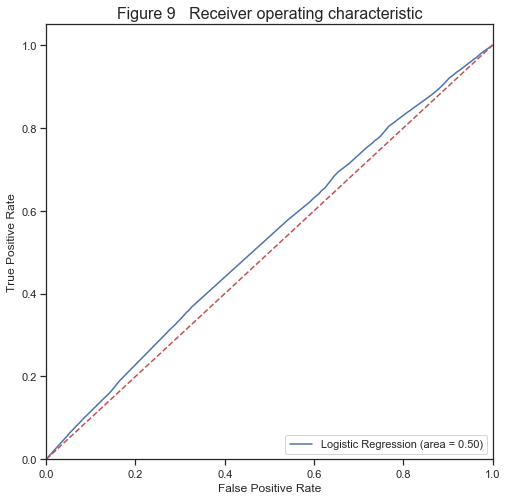

In [34]:
logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.title('Figure 9   Receiver operating characteristic', fontsize = 16)
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Conclusions

##### Chain vs Non-Chain Restaurants
We found that while some chains do in fact perform better than average, there  are also chains that perform significantly worse than average.  Simply being part of a chain does not translate into safer restaurants.

##### Number of High, Medium and Low Risk Violations Per Restaurant, Per Year

While these average violations per store, per year can vary from year to year, the graph show that the trend over the 10 year period is flat for all three levels of violation risk.

##### Probability Density Distributions of High, Medium and Low Risk Violations, per Restaurant
The probability density distributions of high, medium and low risk violations, per restaurant is extremely right skewed or positively skewed. Indeed, some stores have 900 or 700 violations, making the graph have an extremely long tail. In right skewed data, we can see that mode < median < mean. 

This data has a practical application in helping inspectors prioritize which restaurants to inspect more than once a year. 

##### Predicting Failed Inspections  with Logistic Regression
The first iteration predicting failed inspections using logistic regression gave gave a little predictive lift.  This model can likely be significantly improved by including different or additional columns as predictors.    

A practical application of these results is to inspect those restaurants that have the highest likelihood of failing, to prevent public health disasters before they happen.


### Appendix A:  Data Dictionary
			
	
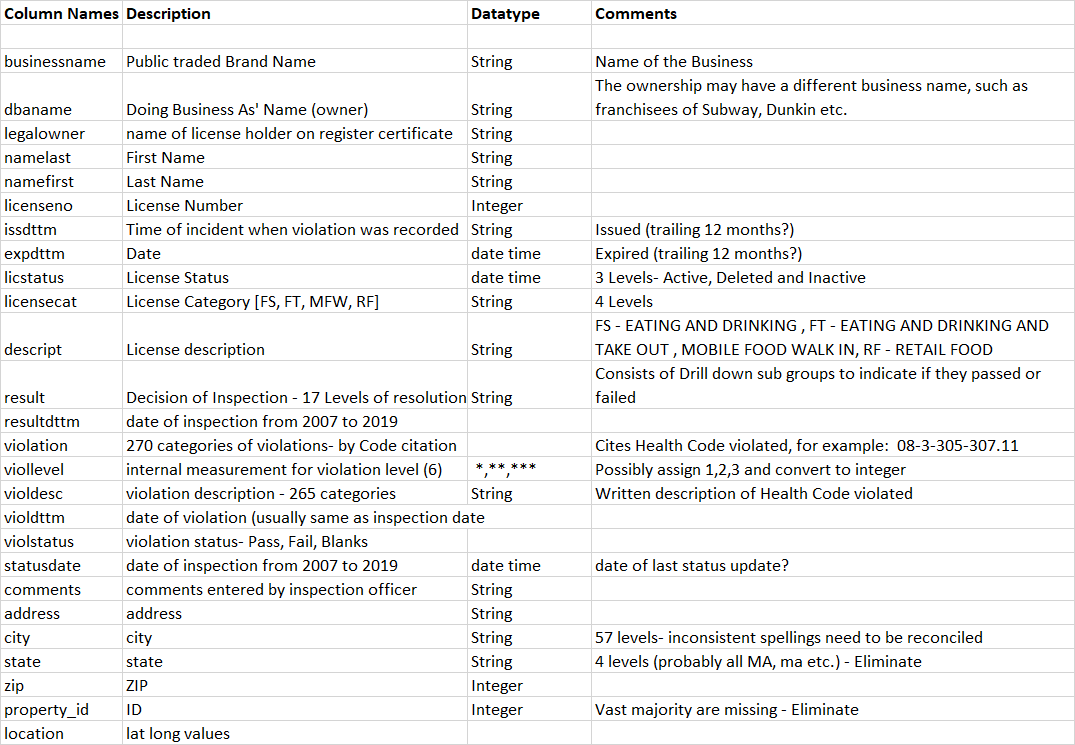

### Appendix B:  Explanation of Result values, email from Diane Chalifoux
#### Principal Health Inspector,  Boston Inspectional Services

8/2/19

Some of these are result codes for plan review and some (HE_) are for inspection results when compliance is required -fail, is in full compliance -pass, has minor filed violations , has an extension to correct violations or may require an administrative hearing for uncorrected violations. TSOP is a temporary suspension of permit,followed by out of business, closure for operating without a permit,  I hope this is helpful. 


Diane Chalifoux - Judge REHS / R.S., CP-FS
Principal Health Inspector
Boston Inspectional Services, Health Division
(617) 961-3211
Fax (617) 635-5388
